In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the dataset
df = pd.read_csv("/Users/lucamambelli/Desktop/data-science-portfolio/projects/01_automobile_eda/data/imports-85.data")
df.head()

In [9]:
df.columns
cols = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [ ]:
df = pd.read_csv("/Users/lucamambelli/Desktop/data-science-portfolio/projects/01_automobile_eda/data/imports-85.data", header = None,  names = cols, na_values = "?")
df.head()

In [ ]:
df.info()

In [ ]:
# Check for missing values in each column
df.isnull().sum()

As we can see the data set contains for the column "normalized-losses" 41 missing values. I've decided to fill missing values using the mean "pretending" that those cars have average risk. I decided not to drop the entire column because normalized-loss represents the average loss payment per insured vehicle compared to cares of similar classification, so dropping it would mean to loose the risk feature of the data set

In [23]:
# 1. Convert the column to numeric first (forcing errors to NaN if any remain)
# This ensures we can actually calculate the mean
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')

# 2. Calculate the mean of THAT column only
mean_loss = df["normalized-losses"].mean()
print(f"Average Normalized Loss: {mean_loss}")

# 3. Fill NaN values in THAT column only
df["normalized-losses"] = df["normalized-losses"].fillna(mean_loss)

# Check if it worked (should be 0)
print(f"Missing values in normalized-losses: {df['normalized-losses'].isnull().sum()}")

Average Normalized Loss: 122.0
Missing values in normalized-losses: 0


In [ ]:
df.isnull().sum()

In [55]:
continuous_cols = ["bore", "stroke", "horsepower", "peak-rpm"]
for col in continuous_cols:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(df[col].mean())
df["num-of-doors"] = df["num-of-doors"].fillna(df["num-of-doors"].mode()[0])

In [58]:
# Drop rows where 'price' is NaN
df.dropna(subset=["price"], axis=0, inplace=True)

# Reset index because we dropped rows
df.reset_index(drop=True, inplace=True)

# Verify
print(f"New shape of dataframe: {df.shape}")

New shape of dataframe: (201, 26)


## Visualization

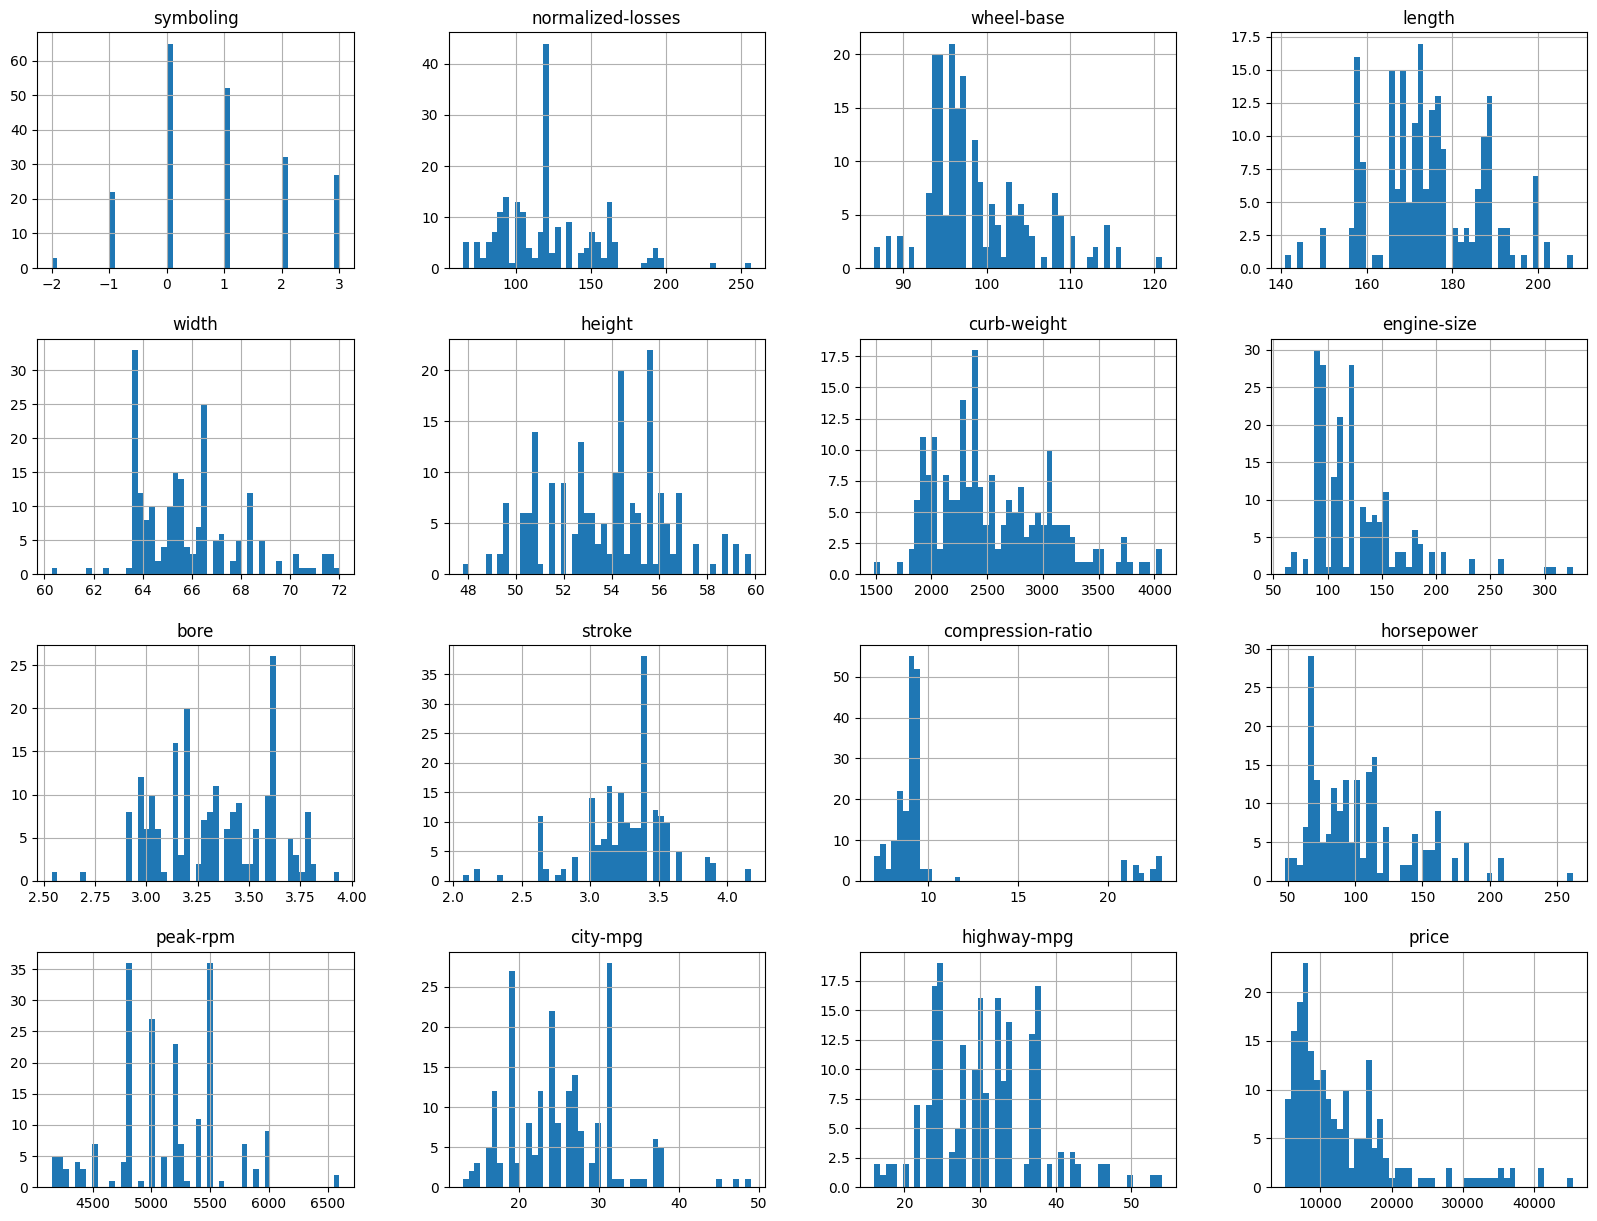

In [61]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Relationships between variables

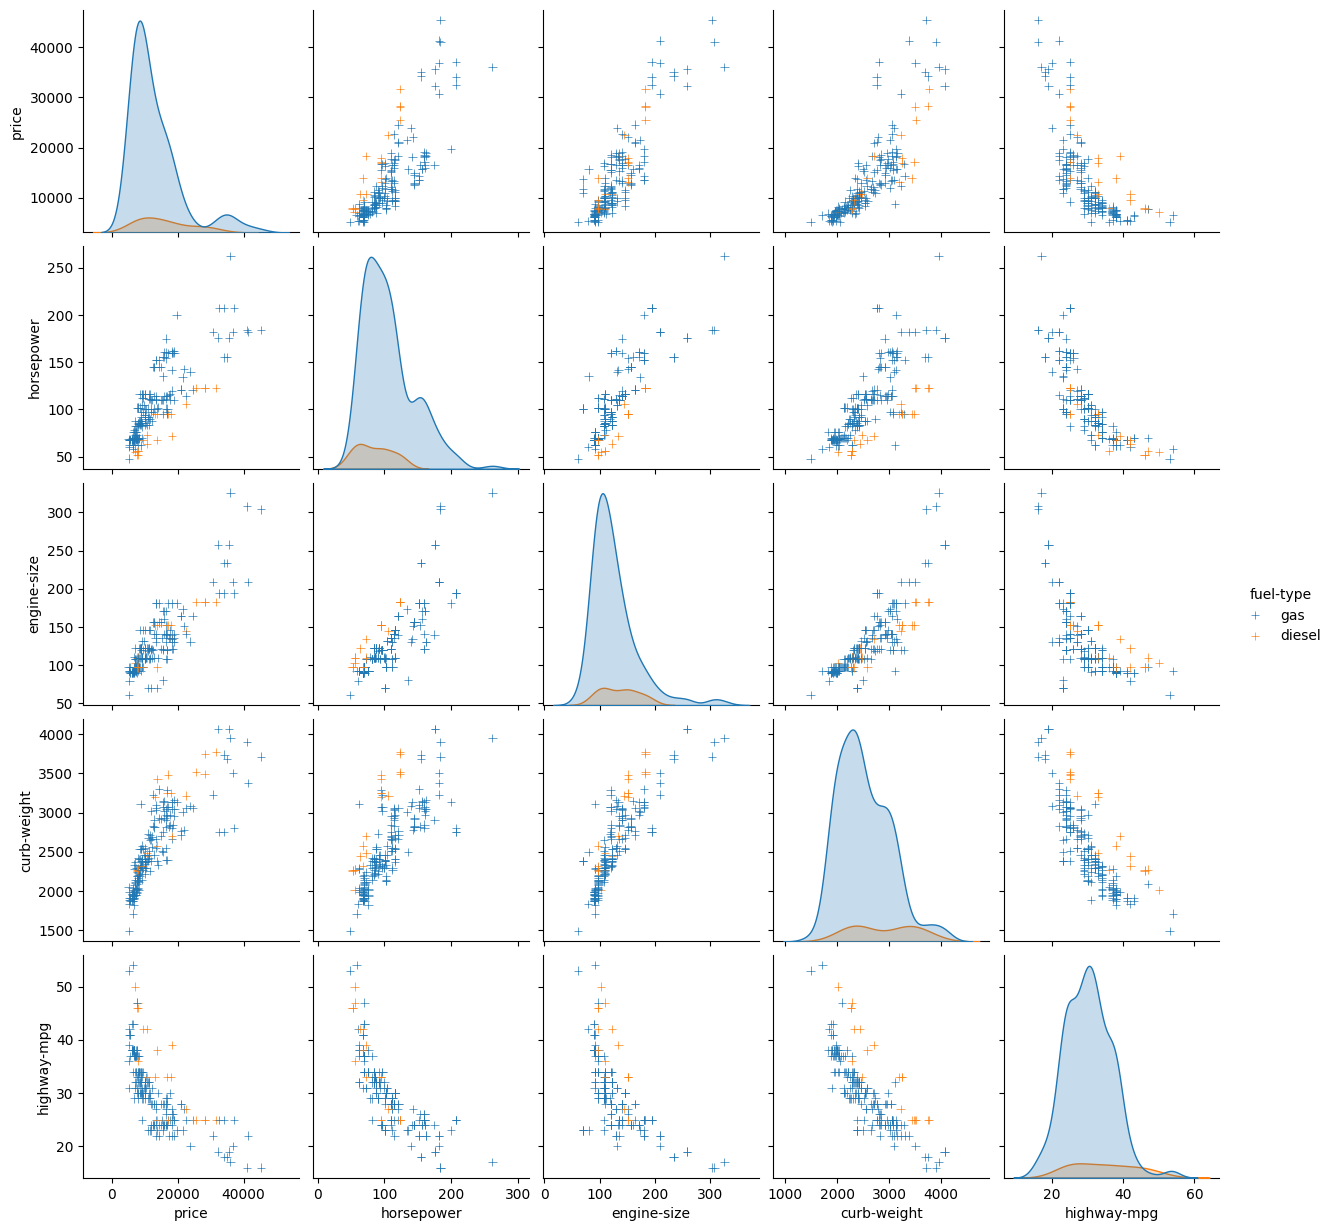

In [102]:
tmp = ["price", "horsepower", "engine-size", "curb-weight", "highway-mpg", "fuel-type"]
sns.pairplot(df[tmp], hue = "fuel-type", height= 2.5, markers = "+")
plt.show()

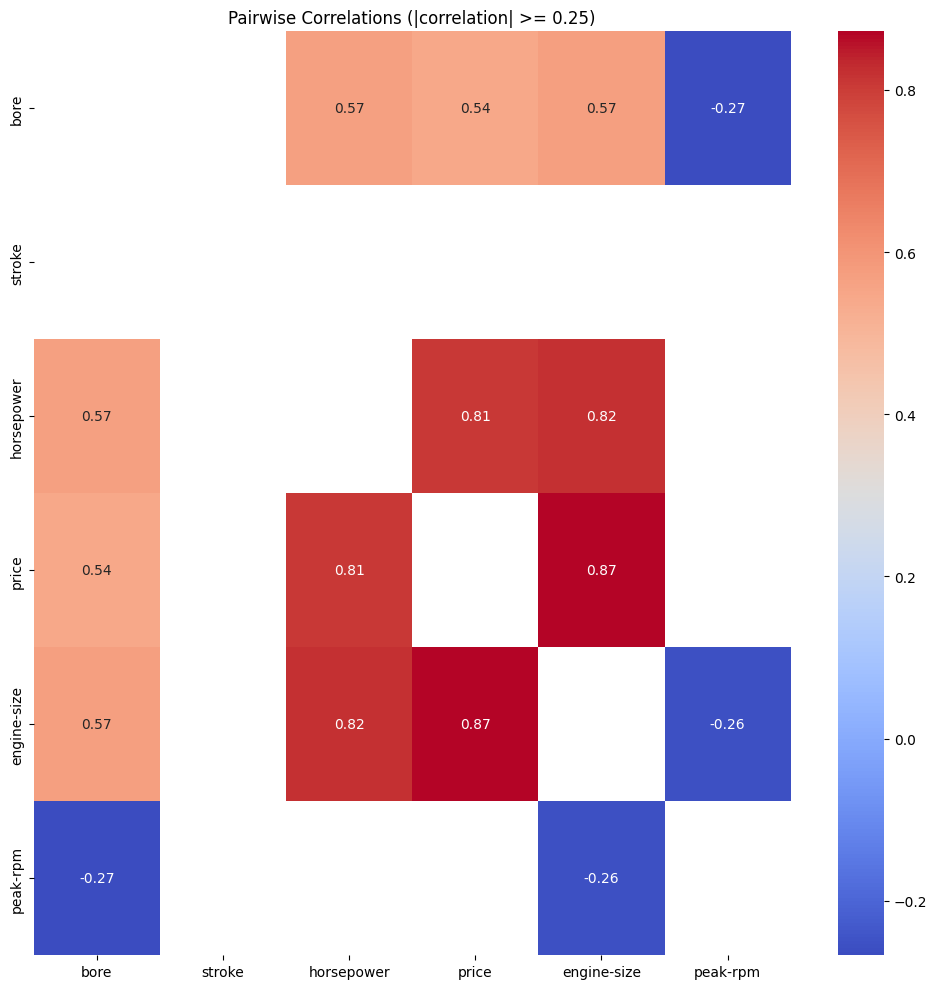

In [75]:
features_to_check = ["bore", "stroke", "horsepower", "price", "engine-size", "peak-rpm"]
correlation_matrix = df[features_to_check].corr() # Compute the correlation matrix only on numerical features
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() >= 0.25]  # Mask correlations with absolute values below 0.25
filtered_correlation_matrix[np.eye(filtered_correlation_matrix.shape[0], dtype=bool)] = np.nan  # Mask the diagonal
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Correlations (|correlation| >= 0.25)")
plt.tight_layout()